In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [3]:
d = pd.read_pickle("data/orderbook.pkl")
d = d[d.pair == "BTC/USD"]
d = d[d.exchange == "kraken"]
d = d.drop(["pair", "exchange"], axis = 1)
d = d.rename( {"bestAskPrice":"askp", "bestAskVolume":"askv", "bestBidPrice":"bidp", "bestBidVolume":"bidv"} ,axis = 1)

In [4]:
d["mid"] = ( d.askp + d.bidp ) / 2
d["i"] = d.bidv / ( d.bidv + d.askv )
d["wmid"] = d.bidp * (1 - d.i) + d.askp * d.i
d["sp"] = d.askp - d.bidp

d["wmid_shift"] = d.wmid.shift(-1)
d = d.iloc[1:, :]
d = d.reset_index( drop = True)

d["wmidchange"] = (d.wmid_shift - d.wmid) / d.wmid

In [5]:
d.head()

,ts,askp,askv,bidp,bidv,mid,i,wmid,sp,wmid_shift,wmidchange
0,2018-04-17 10:56:24,8099.0,2.469,8094.0,1.19,8096.50,0.325225,8095.626127,5.0,8097.892460,0.000280
1,2018-04-17 10:56:29,8098.9,0.209,8095.0,0.60,8096.95,0.741656,8097.892460,3.9,8095.879765,-0.000249
2,2018-04-17 10:56:35,8099.5,2.469,8095.0,0.60,8097.25,0.195503,8095.879765,4.5,8098.366169,0.000307
3,2018-04-17 10:56:40,8101.6,1.000,8095.1,1.01,8098.35,0.502488,8098.366169,6.5,8095.362295,-0.000371
4,2018-04-17 10:56:46,8101.5,0.234,8095.1,0.01,8098.30,0.040984,8095.362295,6.4,8097.876271,0.000311


#### Weighted mid price vs imbalance

<AxesSubplot:xlabel='wmid', ylabel='i'>

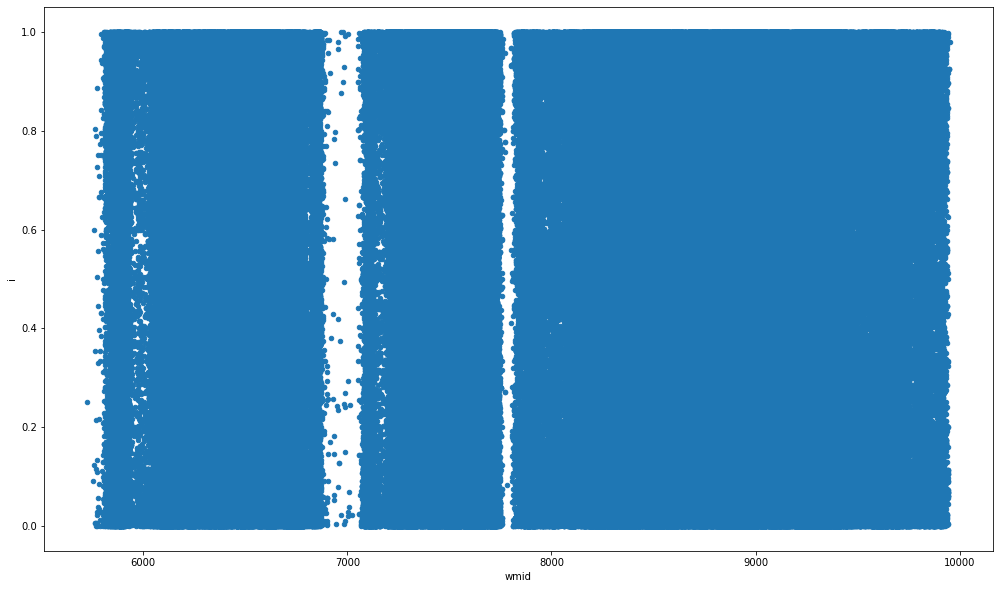

In [11]:
d.plot.scatter(x = "wmid", y = "i", figsize = (17, 10))

#### Weighted mid price vs spread

<AxesSubplot:xlabel='wmid', ylabel='sp'>

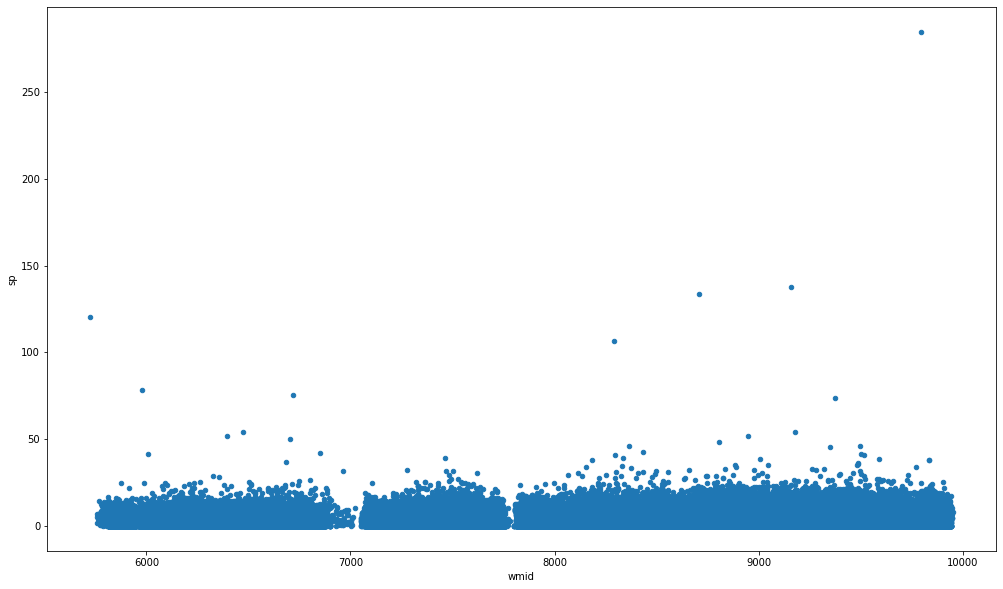

In [12]:
d.plot.scatter(x = "wmid", y = "sp", figsize = (17, 10))

#### Imbalance vs spread

<AxesSubplot:xlabel='i', ylabel='sp'>

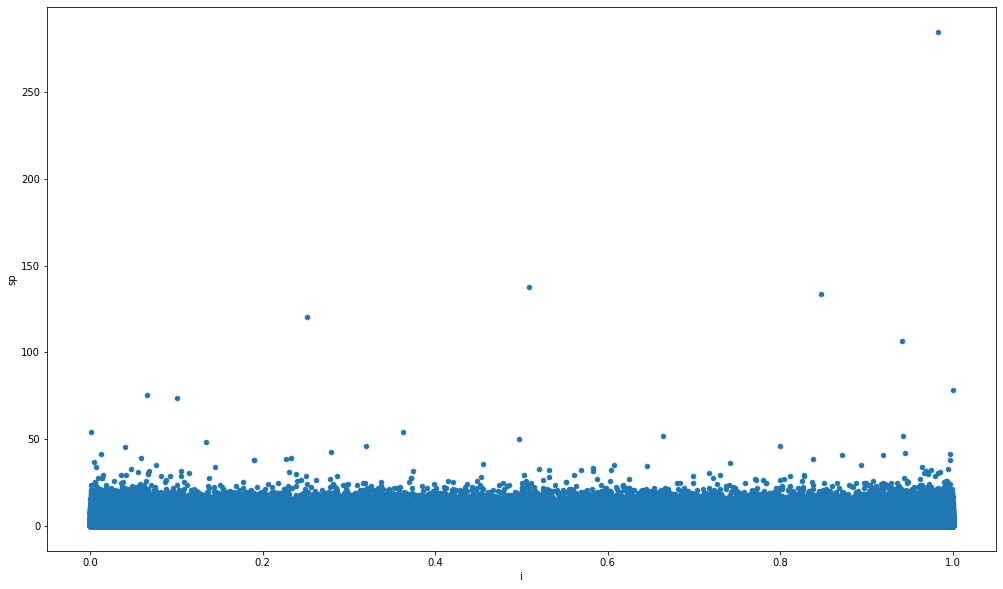

In [13]:
d.plot.scatter(x = "i", y = "sp", figsize = (17, 10))

#### Rsquared dependancy on rolling window size

In [14]:
y = d[["i", "sp", "wmidchange"]]

In [15]:
f = "wmidchange~i+sp"
ws = [100, 200, 500, 1000, 2500, 5000, 7500, 10000, 25000, 50000]
for w in ws:
    rs = []
    for i in range(w, len(y), w):
        temp = y.iloc[i-w:i,:]
        model = ols(formula = f, data=temp).fit()
        rs.append(model.rsquared)
    print(w, ":", np.nanmean(rs))

/Users/mgaulia/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


100 : 0.08778077810018566
200 : 0.061519970815616776
500 : 0.04441026012851255
1000 : 0.037833135051723935
2500 : 0.032721217245032026
5000 : 0.03036341889565825
7500 : 0.029497818144668068
10000 : 0.02870833721149098
25000 : 0.027172081141861777
50000 : 0.02640618230879768
